# Funcion Gamma

$$ \gamma(a) = \int_{0}^{\infty}x^{a-1}e^{-x}dx $$

a) Definir la funcion de la integral (ergo, dentro de la integral)

In [1]:
from numpy import exp
def gamma(a,x):
    return(x**(a-1) * exp(-x))  #Defino la funcion dentro de la Integral a) Listo


b) Grafique la funcion para a=2,3y4 entre x=0 y x=10, estos mismos considerelos como los limites de la integracion

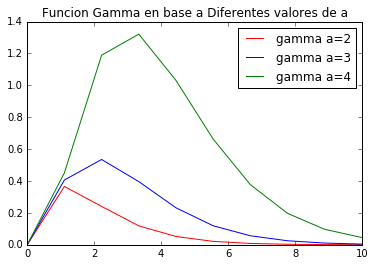

In [2]:
from matplotlib.pyplot import show,plot,title,legend,show
from numpy import linspace

x_o = 0
x_f = 10   #Defino los limites
N = 10

x = linspace(x_o,x_f,N)


y_2 = gamma(2,x)  #Expreso la funcion gamma para evitar problemas de dimension que puede provocar python
y_3 = gamma(3,x)
y_4 = gamma(4,x)

plot(x,y_2,color="r",label="gamma a=2")
plot(x,y_3,color="b",label="gamma a=3")
plot(x,y_4,color="g",label="gamma a=4")
legend()
title("Funcion Gamma en base a Diferentes valores de a")
show()

c) Evalue la integral usando el metodo del trapezoide, evalue el error para alcanzar una precision de e=10^-6
Se utilizan valor de a conocidos, tal como a=2

In [3]:
def gammaI(a,x_o,x_f,N):  #Realizare una funcion que integre automaticamente, para hacer los graficos
    #Integrare con metodo trapezoide
    h = (x_f-x_o)/N #Defino la h
    #La segunda y tercera, el valor de 1/2 f(a) y 1/2 f(b)
    A1 = 0.5 * gamma(a,x_o) + 0.5 * gamma(a,x_f)
    #La ultima es la sumatoria... eso es un loop for btw
    A2 = 0 #Como placeholder
    for k in range(1,N): #Ira de 1 a N-1
        A2 += gamma(a , (x_o + k*h))
        #Es

    A_total = h*(A1 + A2)
    return(A_total)

#y ahora calcularemos el error de esta integral para lo que tambien haremos una funcion que calcule los errores

#Necesitaremos la derviada de esa funcion en especifico, para a=2
#La cual es = -e^(-x) (-1 + x), la definimos
def df(x):
    return(float(exp(-x) * (1 - x )))

def error_t(x_o,x_f,N): 
    h = float((x_o - x_f)/(N))
    d_sum = float(df(x_o) - df(x_f))
    return(float(1.0/12.0 * h*h *(d_sum)))

print(gammaI(2,x_o,x_f,N))

0.920140579026


In [4]:
#Ahora pasamos a analizar el error y a buscar una exactitud mayor
em = 10e-6 #Es el error que buscamos, error meta


N2 = N*2
I2 = gammaI(2,x_o,x_f,N2)

et= (1.0/3.0)*abs( gammaI(2,x_o,x_f,N)- I2 ) #Error del trapecio

while(et>=em):
        N=N2
        N2=2*N2
        i = gammaI(2,x_o,x_f,N)
        e2= (1.0/3.0)*abs(i - I2)
        if(et<=em):
            print("El error obtenido con ",N,"fue de ",e2)
            break #Un break adicional, solo por seguridad, los whiles complejos tienden a explotar
            
        else:
            I2=i

#Ahora con el valor de N realizamos esa integral
print(gammaI(2,x_o,x_f,N2))
print(N2)

KeyboardInterrupt: 

d) Evaluar la integral con el metodo de Simpson y igual que en lo anterior, encontrar con Integracion Adaptativa un error de 10e-6

In [12]:
#Primero que todo Integramos con Metodo de Simpson
#Funcion de integracion Simpson
def simp(x_o,x_f,N,a=2):
    t = 0.333333333333333
    h = float(x_f-x_o)/float(N)
    A1 = float(gamma(a,x_o)) + float(gamma(a,x_f))
    A2 = 0.0
    for k in range(1,int(N/2)+1):
        A2 += gamma(a,x_o + (2.*k-1)*h)

    A3 = 0.0
    for k in range(1,int(N/2)):
        A3 += gamma(a,x_o +2.*k*h)

    return( t*h*(A1+4.*A2+2.*A3) )

print(simp(x_o,x_f,N))

0.999500600773


In [14]:
#Ahora la parte de integracion adaptativa
em = 10e-6 #Es el error que buscamos, error meta


N2 = N*2
I2 = simp(x_o,x_f,N2)

et= (1.0/15.0)*abs( simp(x_o,x_f,N)- I2 ) #Error del trapecio

while(et>=em):
        N=N2
        N2=2*N2
        i = simp(x_o,x_f,N)
        e2= (1.0/15.0)*abs(i - I2)
        if(et<=em):
            print("El error obtenido con ",N2,"fue de ",e2)
            break
            
        else:
            I2=i
            
#Ahora con el valor de N realizamos esa integral
print(simp(x_o,x_f,N2))
print(N2)

0.999500600773
20971520


e) No entendi la cuadratica gaussiana :c

f) Comparar resultados con valores conocidos de la funcion Gamma(a=1,a=3/2,a=5/2)

In [ ]:
print(simp(x_o,x_f,N2,1), "comparado con", 1)
print(simp(x_o,x_f,N2,3/2), "comparado con", 0.886)
print(simp(x_o,x_f,N2,5/2), "comparado con", 1.329)

(0.99995460007029469, 'comparado con', 1)
(0.99995460007029469, 'comparado con', 0.886)


h) Diferencias entre los metodos
* El metodo más efectivo depende de la funcion con la que trabajemos, por ejemplo la trapezoide funciona a base de crear figuras, es excelente para graficos semi lineales; la funcion Simpson aproxima funciones cuadraticas, por lo que las funciones de tipo exponencial son su fuerte, cada una en su debida area funciona mejor.
* Para el caso de nuestra funcion, la funcion Gamma que estamos tratando: utilizando el metodo de integracion adaptativa con el trapezoide tomo un tiempo exagerado y ni si quiera llego a la precision que buscaba; con el metodo Simpson obtuve valores muy exactos incluso con N's pequeños, esto debido a la composicion de la funcion, entre potencia y exponencial.